# Select Best Model Parameters

### Parameter tuning using GridSearchCV

In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
#from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV

* Allows to define a *grid of parameters* that will be searched using K-fold cross-validation

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
knn = KNeighborsClassifier(n_neighbors=5)

In [3]:
# Define the parameter values that should be searched
k_range = range(1, 31)
print(k_range)

range(1, 31)


In [4]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': range(1, 31)}


In [5]:
# Instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [6]:
# fit the grid with the data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(1, 31)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [7]:
# view the complete results
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [8]:
# Examine first tuple
print(grid.cv_results_['params'][0])
print(grid.cv_results_['split0_test_score'])
print(grid.cv_results_['mean_test_score'][0])

{'n_neighbors': 1}
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.93333333 1.         0.93333333 1.
 0.93333333 1.         0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333]
0.96


In [9]:
# Create a list of the mean scores only
grid_mean_scores = [result for result in grid.cv_results_['mean_test_score']]
print(grid_mean_scores)

[0.96, 0.9533333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.98, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.98, 0.9733333333333334, 0.98, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.96, 0.9666666666666667, 0.96, 0.9666666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


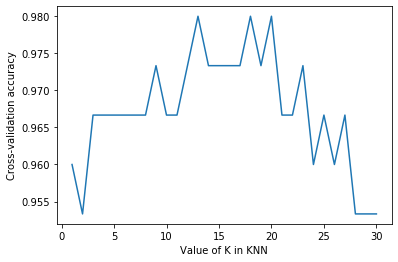

In [10]:
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K in KNN')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [11]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


## Searching multiple parameter simultaneusly

**Example**: tuning _max_depth_ and _min_samples_leaf_ for _DecissionTreeClassifier_

In [12]:
# Define the parameter values that should be searched
k_range = range(1, 31)
weight_options = ['uniform', 'distance']

In [13]:
# Create a parameter grid
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}


In [14]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [15]:
grid.cv_results_

{'mean_fit_time': array([0.0009752 , 0.00090623, 0.00052581, 0.00054355, 0.00053551,
        0.00053153, 0.00051618, 0.00051732, 0.00052228, 0.00053463,
        0.00052912, 0.00051196, 0.0005126 , 0.00051858, 0.00055511,
        0.00052917, 0.00052292, 0.0005168 , 0.00051348, 0.00051932,
        0.00051022, 0.00055301, 0.00052137, 0.00051982, 0.00051913,
        0.00052197, 0.00051873, 0.00051146, 0.00051558, 0.00051248,
        0.00053241, 0.00051234, 0.0005208 , 0.0005132 , 0.00056636,
        0.00069547, 0.00061269, 0.00054786, 0.0005635 , 0.00053408,
        0.00052686, 0.00055099, 0.00051835, 0.00052397, 0.00054841,
        0.00052884, 0.00051947, 0.00051453, 0.00077171, 0.00054688,
        0.00054278, 0.00052533, 0.00052223, 0.00051651, 0.00052252,
        0.00051334, 0.00051649, 0.00053232, 0.00052676, 0.00051339]),
 'std_fit_time': array([2.85240147e-04, 3.32582381e-04, 1.70142020e-05, 5.38756147e-05,
        5.95474398e-05, 2.53938061e-05, 5.66313137e-06, 1.86146136e-05,
     

In [16]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


## Using the best parameter to make predictions

In [17]:
# Train model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X,y)

# make a prediction on out-of-sample data
knn.predict([[3,5,4,2]])

array([1])

In [18]:
# Shprtcut: GridSearchCV automatically refits the best model using all the data
grid.predict([[3,5,4,2]])

array([1])

## Reducing computational expenses using RandomizedSearchCV

In [19]:
from sklearn.model_selection import RandomizedSearchCV

* Searches a subset of parameters, and you can control the computational budget

In [20]:
param_dist = dict(n_neighbors=k_range, weights=weight_options)

* **Important:** Specify a continuous distribution (rather than a list) for any continuous parameters

In [21]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, 
                          scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X,y)
rand.cv_results_

{'mean_fit_time': array([0.00072532, 0.00077293, 0.00061758, 0.00052404, 0.00052164,
        0.00052226, 0.00052929, 0.00052862, 0.00052488, 0.00051737]),
 'std_fit_time': array([2.06697023e-04, 2.65236730e-04, 1.89591709e-04, 2.06501322e-05,
        2.00048532e-05, 2.07306977e-05, 2.65596585e-05, 1.88657655e-05,
        3.29723930e-05, 1.28184081e-05]),
 'mean_score_time': array([0.00135357, 0.0025557 , 0.00203874, 0.0018055 , 0.00186257,
        0.00103054, 0.00104835, 0.00179513, 0.00106189, 0.00177143]),
 'std_score_time': array([2.09433346e-04, 7.51176327e-04, 3.67357641e-04, 3.38644701e-05,
        1.11589258e-04, 3.21142303e-05, 1.85195996e-05, 5.85287311e-05,
        1.04324705e-04, 3.14360932e-05]),
 'param_weights': masked_array(data=['distance', 'uniform', 'uniform', 'uniform', 'uniform',
                    'distance', 'distance', 'uniform', 'distance',
                    'uniform'],
              mask=[False, False, False, False, False, False, False, False,
              

In [22]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}
